In [97]:
%reload_ext autoreload
%autoreload 2

import torch

import numpy as np
import matplotlib.pyplot as plt

from datasets import *
from models import *
from losses import *

In [92]:
device = 'cpu'

In [98]:
data_generator = GaussianDataset(device=device)

data_generator.generate_data(5000, 1)
train_loader = torch.utils.data.DataLoader(data_generator, batch_size=500, shuffle=True)

print('mean:', round(torch.mean(data_generator.y).item(), 2), 'std:', round(torch.std(data_generator.y).item(), 2))

data_generator.generate_data(1000, 1)
test_loader = torch.utils.data.DataLoader(data_generator, batch_size=1000, shuffle=True)

mean: 0.02 std: 2.19


likelihood: tensor(1.8786)2.67
log_prior: tensor(1.9806)
log_p_q: tensor(1.7042)
elbo: tensor(2.6928)


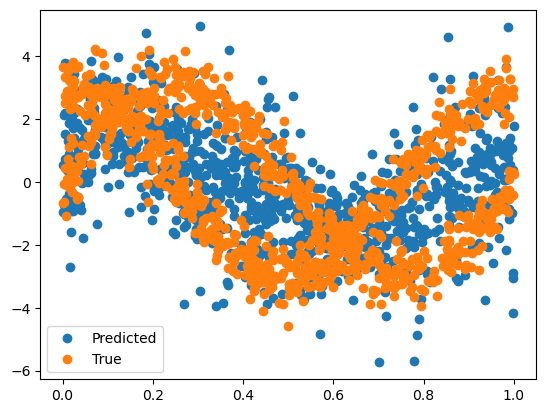

In [100]:
model = GMNN(1).to(device)
epochs = 2000
optim = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = GaussianMixtureLoss(torch.mean(data_generator.y).item(), torch.std(data_generator.y).item(), device=device)

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('Epoch:', epoch, 'to', epoch+100, 'Loss:', round(loss.item(), 2), end='\r', flush=True)

    for X, y in train_loader:
        optim.zero_grad()
        y_pred, mu, log_var, weights = model(X)
        loss = loss_fn(y_pred, y, mu, log_var, weights)
        loss.backward()
        optim.step()


X_test_list, y_test_list, y_pred_list, mu_pred_list = [], [], [], []
with torch.no_grad():
    for X, y in test_loader:
        X_test_list += X.flatten().tolist()
        y_test_list += y.flatten().tolist()
        y_pred, mu, log_var, weights = model(X)
        y_pred_list += y_pred.flatten().tolist()
        mu_pred_list += mu.mean(dim=1).flatten().tolist()
        loss_fn.loss_eval(y_pred, y, mu, log_var, weights)

plt.plot(X_test_list, y_pred_list, 'o', label='Predicted')
plt.plot(X_test_list, y_test_list, 'o', label='True')
# plt.plot(X_test_list, mu_pred_list, 'o', label='Mean')
# plt.plot(X_test_list, np.array(X_test_list)*5, label='True')
plt.legend()
plt.show()

likelihood: tensor(1.5988)2.32
log_prior: tensor(3.9108)
log_p_q: tensor(1.6250)
elbo: tensor(3.3429)


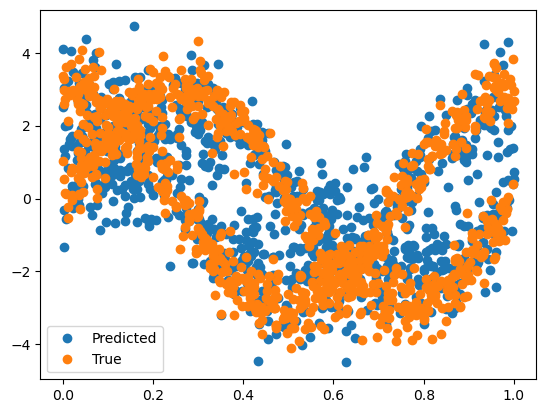

In [76]:
model = GMNN(2).to(device)
epochs = 2000
optim = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = GaussianMixtureLoss(torch.mean(data_generator.y).item(), torch.std(data_generator.y).item(), device=device)

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('Epoch:', epoch, 'to', epoch+100, 'Loss:', round(loss.item(), 2), end='\r', flush=True)
    for X, y in train_loader:
        optim.zero_grad()
        y_pred, mu, log_var, weights = model(X)
        loss = loss_fn(y_pred, y, mu, log_var, weights)
        loss.backward()
        optim.step()

X_test_list, y_test_list, y_pred_list, mu_pred_list = [], [], [], []
with torch.no_grad():
    for X, y in test_loader:
        X_test_list += X.flatten().tolist()
        y_test_list += y.flatten().tolist()
        y_pred, mu, log_var, weights = model(X)
        y_pred_list += y_pred.flatten().tolist()
        mu_pred_list += mu.mean(dim=1).flatten().tolist()
        loss_fn.loss_eval(y_pred, y, mu, log_var, weights)

plt.plot(X_test_list, y_pred_list, 'o', label='Predicted')
plt.plot(X_test_list, y_test_list, 'o', label='True')
# plt.plot(X_test_list, mu_pred_list, 'o', label='Mean')
# plt.plot(X_test_list, np.array(X_test_list)*5, label='True')
plt.legend()
plt.show()

likelihood: tensor(1.5996)2.39
log_prior: tensor(4.0944)
log_p_q: tensor(1.5911)
elbo: tensor(3.2028)


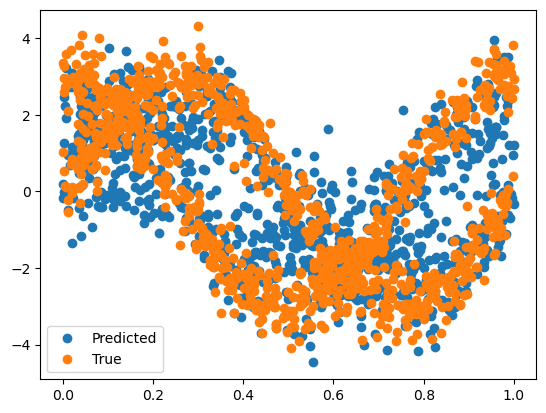

In [77]:
model = GMNN(3).to(device)
epochs = 2000
optim = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = GaussianMixtureLoss(torch.mean(data_generator.y).item(), torch.std(data_generator.y).item(), device=device)

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('Epoch:', epoch, 'to', epoch+100, 'Loss:', round(loss.item(), 2), end='\r', flush=True)
    for X, y in train_loader:
        optim.zero_grad()
        y_pred, mu, log_var, weights = model(X)
        loss = loss_fn(y_pred, y, mu, log_var, weights)
        loss.backward()
        optim.step()

X_test_list, y_test_list, y_pred_list, mu_pred_list = [], [], [], []
with torch.no_grad():
    for X, y in test_loader:
        X_test_list += X.flatten().tolist()
        y_test_list += y.flatten().tolist()
        y_pred, mu, log_var, weights = model(X)
        y_pred_list += y_pred.flatten().tolist()
        mu_pred_list += mu.mean(dim=1).flatten().tolist()
        loss_fn.loss_eval(y_pred, y, mu, log_var, weights)

plt.plot(X_test_list, y_pred_list, 'o', label='Predicted')
plt.plot(X_test_list, y_test_list, 'o', label='True')
# plt.plot(X_test_list, mu_pred_list, 'o', label='Mean')
# plt.plot(X_test_list, np.array(X_test_list)*5, label='True')
plt.legend()
plt.show()

likelihood: tensor(1.5608)2.35
log_prior: tensor(4.1040)
log_p_q: tensor(1.5659)
elbo: tensor(3.2447)


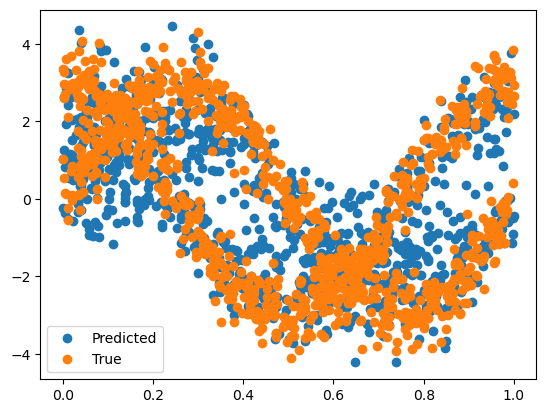

In [78]:
model = GMNN(4).to(device)
epochs = 2000
optim = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = GaussianMixtureLoss(torch.mean(data_generator.y).item(), torch.std(data_generator.y).item(), device=device)

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('Epoch:', epoch, 'to', epoch+100, 'Loss:', round(loss.item(), 2), end='\r', flush=True)
    for X, y in train_loader:
        optim.zero_grad()
        y_pred, mu, log_var, weights = model(X)
        loss = loss_fn(y_pred, y, mu, log_var, weights)
        loss.backward()
        optim.step()

X_test_list, y_test_list, y_pred_list, mu_pred_list = [], [], [], []
with torch.no_grad():
    for X, y in test_loader:
        X_test_list += X.flatten().tolist()
        y_test_list += y.flatten().tolist()
        y_pred, mu, log_var, weights = model(X)
        y_pred_list += y_pred.flatten().tolist()
        mu_pred_list += mu.mean(dim=1).flatten().tolist()
        loss_fn.loss_eval(y_pred, y, mu, log_var, weights)

plt.plot(X_test_list, y_pred_list, 'o', label='Predicted')
plt.plot(X_test_list, y_test_list, 'o', label='True')
# plt.plot(X_test_list, mu_pred_list, 'o', label='Mean')
# plt.plot(X_test_list, np.array(X_test_list)*5, label='True')
plt.legend()
plt.show()

likelihood: tensor(1.5925)2.44
log_prior: tensor(3.9292)
log_p_q: tensor(1.6488)
elbo: tensor(3.3074)


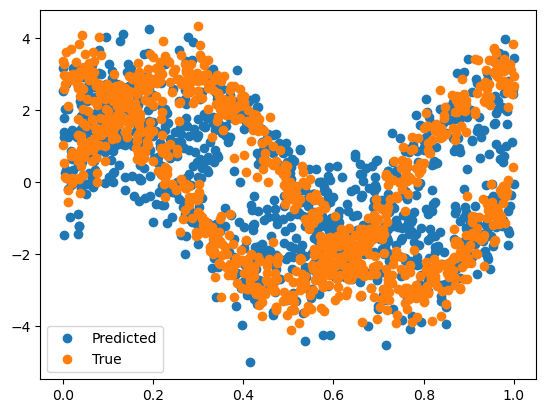

In [79]:
model = GMNN(5).to(device)
epochs = 2000
optim = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = GaussianMixtureLoss(torch.mean(data_generator.y).item(), torch.std(data_generator.y).item(), device=device)

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('Epoch:', epoch, 'to', epoch+100, 'Loss:', round(loss.item(), 2), end='\r', flush=True)
    for X, y in train_loader:
        optim.zero_grad()
        y_pred, mu, log_var, weights = model(X)
        loss = loss_fn(y_pred, y, mu, log_var, weights)
        loss.backward()
        optim.step()

X_test_list, y_test_list, y_pred_list, mu_pred_list = [], [], [], []
with torch.no_grad():
    for X, y in test_loader:
        X_test_list += X.flatten().tolist()
        y_test_list += y.flatten().tolist()
        y_pred, mu, log_var, weights = model(X)
        y_pred_list += y_pred.flatten().tolist()
        mu_pred_list += mu.mean(dim=1).flatten().tolist()
        loss_fn.loss_eval(y_pred, y, mu, log_var, weights)

plt.plot(X_test_list, y_pred_list, 'o', label='Predicted')
plt.plot(X_test_list, y_test_list, 'o', label='True')
# plt.plot(X_test_list, mu_pred_list, 'o', label='Mean')
# plt.plot(X_test_list, np.array(X_test_list)*5, label='True')
plt.legend()
plt.show()